### Pichu/Pikachu Discriminator - Simplified Supervised ML Model (k-NN)

--- 

Datapoints, __width__ and __height__, (features) categorized by __label__, are imported as raw data in the following format:

`(width (cm), height (cm), label (0-pichu, 1-pikachu))` <br>
`21.959384499160468, 31.23956701424158, 0` <br>
`23.63591632187622, 36.46821490673444, 1`

Test points are stored in the following format:

```
Test points:
1. (25, 32)
2. (24.2, 31.5)
3. (22, 34)
4. (20.5, 34)
```

The first task is to clean the data and store the data in the same format. Since it's 150 elements in the list, we don't want to do this manually.


The result is plotted and represented with blue datapoints as *Pichus* and yellow as *Pikachus*.

len(PokeWidth)=150, len(PokeHeight)=150, len is equal.
Plotted from lists.


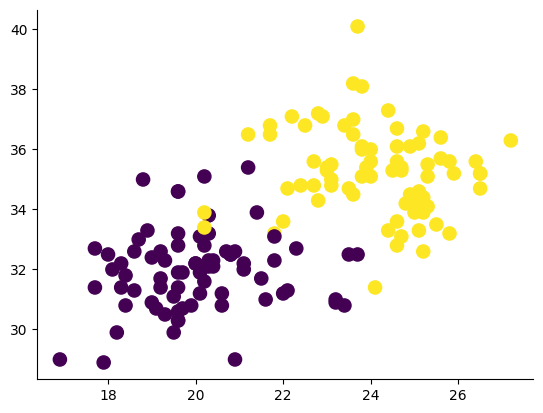

In [32]:
from __future__ import annotations
import re, math, pprint
import numpy as np
import matplotlib.pyplot as plt

def extract_data(data_list: list, dictionary_return: bool) -> None | dict:
    """ Take list with comma separated values and either append rounded values to
    PokeWidth, PokeHeight & PokeLabel lists OR return dictionary. """

    # Method 1: Dictionary heavily inspired by @Andreas-Svensson
    if dictionary_return: # Create and return dictionary
        datapoints = [i.split(", ") for i in data_list]
        item = [[float(i) for i in value] for value in datapoints]

        # Create dictionary
        Pokedex = {
            "Pikachu" : {
            "Width (cm):" :[i[0] for i in item if i[2] == 1],
            "Height (cm):":[i[1] for i in item if i[2] == 1]},
            "Pichu"   : {
            "Width (cm)"  :[i[0] for i in item if i[2] == 0],
            "Height (cm)" :[i[1] for i in item if i[2] == 0]} }
        return Pokedex

    # Method 2: List append heavily inspired by @Kevy69
    for item in data_list: # Append to lists if dictionary_true = False
        # Remove white space and line break
        item = re.sub('[ \n]', '', item)

        # Round (1 decimal) and append data to lists
        width, height, label = [float(string) for string in item.split(',')]
        PokeWidth.append(round(width,1))
        PokeHeight.append(round(height,1))
        PokeLabel.append(int(label))

if __name__ == "__main__":

    # Open and read datapoints.txt
    file_path = "../../Data/datapoints.txt"
    with open(file_path) as datapoints:
        data_list = datapoints.readlines()
        # Remove title from list
        data_list.pop(0)

    PokeWidth = []
    PokeHeight = []
    PokeLabel = []

    # Extract data to lists, checks if length is equal
    extract_data(data_list, 0)
    if len(PokeWidth) == len(PokeHeight):
        print(f"{len(PokeWidth)=}, {len(PokeHeight)=}, len is equal.")
        fig, ax = plt.subplots()

        right_side = ax.spines["right"]
        right_side.set_visible(False)
        top_side = ax.spines["top"]
        top_side.set_visible(False)

        plt.scatter(PokeWidth, PokeHeight, c=PokeLabel, s = 90)

    else:
        raise ValueError(f"len is not equal.")
    
    print("Plotted from lists.")

---
Import test points and compare. Test points are stored in the following format:

```
Test points:
1. (25, 32)
2. (24.2, 31.5)
3. (22, 34)
4. (20.5, 34)
```

In [64]:
#import testpoints.txt

file_path = "../../Data/testpoints.txt"
with open(file_path) as test_points:
        test_data_list = test_points.readlines()


def clean_testpoints(test_data_list: list) -> list:
        # Remove title from list
        test_data_list.pop(0)
        for item in test_data_list:

                # Remove parenthesis with regex
                item = re.sub(r"[\(\)]",'',item)

                # Remove first characters within each line (number and ".") with slicing
                item = item[0:0:] + item[2::]

                # Remove white space and line break with regex
                item = re.sub('[ \n]', '', item)


                #Testing
                print(item)
                print(type(item))
        
        return item

clean_testpoints(test_data_list)

25,32
<class 'str'>
24.2,31.5
<class 'str'>
22,34
<class 'str'>
20.5,34
<class 'str'>


'20.5,34'

In [ ]:
# Input test data to classify


# F
def get_distance(P: tuple, Q: tuple) -> float:
    """Calculates euclidean distance between two points."""
    return math.sqrt((P[0] - Q[0])**2 + (P[1] - Q[1])**2)

def getinput(t: tuple) -> tuple:
    val = input(tuple(input(f"{t}"))).split(',')
    a  = tuple(int(item) for item in val)
    return a

def dist2():
    P = getinput("Input creature width and height, separated by comma:")
    Q = getinput("Select Q, separated by comma:")

